In [ ]:
%pylab inline

## Simple example of Fourier Processing of RGB file

This code preforms the Fourier transform of RGB (ex jpeg) files. 
If the image is $N\times M$ pixels, these files are stored as a  $3\times N\times M$ array.

This will not work for files with alpha transparency, but could be easily modified (these files are $4\times N\times M$)

The basic idea is that each color is separaetly FT'd and put through a mask. Then IFFT'd to get the filtered image.

Text(0.5, 1.0, 'Filtered Kitten')

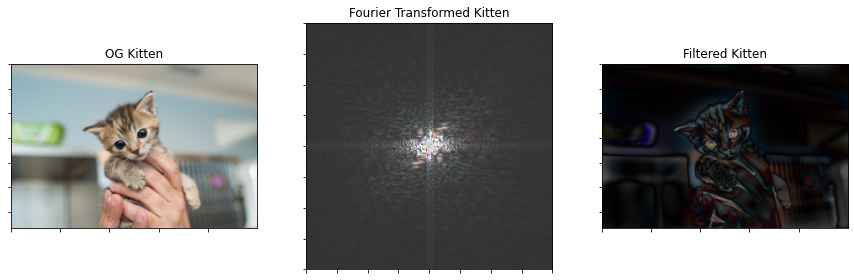

In [35]:
fname = 'images/kitten.jpg' 


Li_raw = imread(fname) # Original Image in raw format

Li_pre = zeros(shape(Li_raw)) # original image, converted to floats
FT_disp = zeros(shape(Li_raw)) # Used to visualize FT. Will contain loss of data via clipping etc
Li_filt = zeros(shape(Li_raw)) # Filtered image
FT_msk = zeros(shape(Li_raw)) # Filter mask

# Convert raw image to array of floats
Li_pre[:,:,0] = Li_raw[:,:,0]/255 # Red
Li_pre[:,:,1] = Li_raw[:,:,1]/255 # Green
Li_pre[:,:,2] = Li_raw[:,:,2]/255 # Blue

shp = shape(Li_raw)
# If we normalize to 1 the first few pixels near DC dominate.
# The 200 is clipping/saturation for viewing and is empirical.
# Clipping seems to look nicer than logarithmic view.
nrm = (shp[0] * shp[1])/200 

# Filter Mask
x = arange(shp[1])
y = arange(shp[0])
X,Y, = meshgrid(x,y)
x0 = max(x)/2
y0 = max(y)/2

filt_type = 'High'

if filt_type == 'High':
    R = 5
    FT_msk = 1-exp(-((X-x0)**2 + (Y-y0)**2)/R**2)
else:
    R = 50
    FT_msk = exp(-((X-x0)**2 + (Y-y0)**2)/R**2)

# Compute the Fourier transform ... in colour!
FT_R = fft.fftshift(fft.fft2(Li_pre[:,:,0]))
FT_G = fft.fftshift(fft.fft2(Li_pre[:,:,1]))
FT_B = fft.fftshift(fft.fft2(Li_pre[:,:,2]))
FT_disp[:,:,0] = abs(FT_R/nrm)
FT_disp[:,:,1] = abs(FT_G/nrm)
FT_disp[:,:,2] = abs(FT_B/nrm)
FT_disp = clip(FT_disp,a_min=0,a_max=1)

# Apply mask
FT_R*=FT_msk
FT_G*=FT_msk
FT_B*=FT_msk

Li_filt[:,:,0] = abs(fft.ifft2(FT_R))
Li_filt[:,:,1] = abs(fft.ifft2(FT_G))
Li_filt[:,:,2] = abs(fft.ifft2(FT_B))

Li_filt = clip(Li_filt,a_min=0,a_max=1)

zm=.1
fig,(ax1,ax2,ax3) = subplots(1,3,figsize=[15,5])

ax1.imshow(Li_raw)
ax2.imshow(FT_disp,extent=[-.5,.5,-.35,.35])
ax2.imshow(1-FT_msk,extent=[-.5,.5,-.35,.35],alpha=.2,cmap='binary')
ax3.imshow(Li_filt)

ax2.set_xlim([-zm,zm])
ax2.set_ylim([-zm,zm])

ax1.xaxis.set_ticklabels([]);
ax1.yaxis.set_ticklabels([]);

ax2.xaxis.set_ticklabels([]);
ax2.yaxis.set_ticklabels([]);

ax3.xaxis.set_ticklabels([]);
ax3.yaxis.set_ticklabels([]);

ax1.set_title(f'OG Kitten')
ax2.set_title(f'Fourier Transformed Kitten')
ax3.set_title(f'Filtered Kitten')